**SEPSIS-CLASSIFICATION PROJECT WITH FAST API DEPLOYMENT**

**Imtroduction**

This project focuses on the early detection and classification of sepsis, a life-threatening medical condition. Sepsis is a critical concern in healthcare, and early diagnosis can significantly improve patient outcomes. The objective is to build a robust machine learning model for sepsis classification and deploy it into a web application using FastAPI, making it accessible for real-time predictions.

**Business Understanding**

We aim to leverage the provided data to address a specific business problem. First, let’s clarify the nature of the dataset to determine its relevance and potential use cases.

**Business Questions**

* What are the key factors influencing the health outcomes in the patient data?
* Can we predict certain health conditions based on the available features?
* How do patient demographics and behaviors vary across different groups?
* What correlations or patterns exist in the patient dataset?
* How can the data be used to improve healthcare services or policies?

**Package Imports**

In [1]:
# Data Manipulation and Hypothesis testing
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr

# For saving the model, processor and cleaned data sets
import pickle
import joblib

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import (
    RobustScaler, 
    LabelEncoder, 
    QuantileTransformer
)
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV, 
    RandomizedSearchCV,
    StratifiedKFold
)
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    recall_score,
    f1_score,
    precision_score,
    roc_auc_score,
    classification_report
)
from sklearn.ensemble import (
    AdaBoostClassifier, 
    BaggingClassifier, 
    ExtraTreesClassifier, 
    GradientBoostingClassifier, 
    RandomForestClassifier
)

# Utilities
import warnings
import joblib
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

**Loading data**

In [2]:
import pandas as pd

# Load the training and test datasets
train_path = 'Data/Paitients_Files_Train.csv'
test_path = 'Data/Paitients_Files_Test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Summarizing the datasets
train_summary = train_data.describe(include='all').transpose()
test_summary = test_data.describe(include='all').transpose()

# Display general information and summaries
train_data_info = train_data.info()
test_data_info = test_data.info()

(train_data.shape, test_data.shape), train_summary, test_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR

(((599, 11), (169, 10)),
            count unique        top freq        mean         std    min    25%  \
 ID           599    599  ICU200608    1         NaN         NaN    NaN    NaN   
 PRG        599.0    NaN        NaN  NaN    3.824708    3.362839    0.0    1.0   
 PL         599.0    NaN        NaN  NaN  120.153589   32.682364    0.0   99.0   
 PR         599.0    NaN        NaN  NaN   68.732888   19.335675    0.0   64.0   
 SK         599.0    NaN        NaN  NaN   20.562604   16.017622    0.0    0.0   
 TS         599.0    NaN        NaN  NaN   79.460768  116.576176    0.0    0.0   
 M11        599.0    NaN        NaN  NaN   31.920033    8.008227    0.0   27.1   
 BD2        599.0    NaN        NaN  NaN    0.481187    0.337552  0.078  0.248   
 Age        599.0    NaN        NaN  NaN   33.290484   11.828446   21.0   24.0   
 Insurance  599.0    NaN        NaN  NaN    0.686144    0.464447    0.0    0.0   
 Sepssis      599      2   Negative  391         NaN         NaN    NaN  

**Summary of Loaded data**

Training Dataset:

* Shape: 599 rows × 11 columns
* Key Fields:
    * ID: Unique identifier for each patient.
    * PRG, PL, PR, SK, TS, M11, BD2: Numeric features, likely representing medical or physiological measurements.
    * Age: Patient's age.
    * Insurance: Binary indicator for insurance coverage.
    * Sepssis: Target variable indicating if the patient has sepsis (categorical: "Positive" or "Negative").
* No missing values in the dataset.

Testing Dataset:

* Shape: 169 rows × 10 columns

* Similar to the training dataset but lacks the Sepssis column (target variable)

**Exploratory Data Analysis**

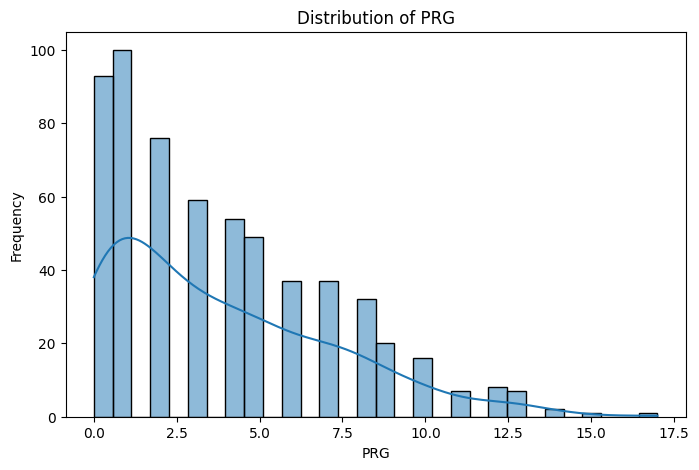

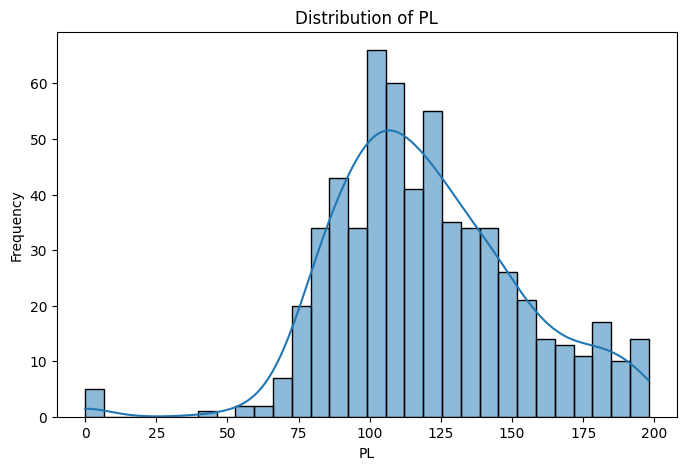

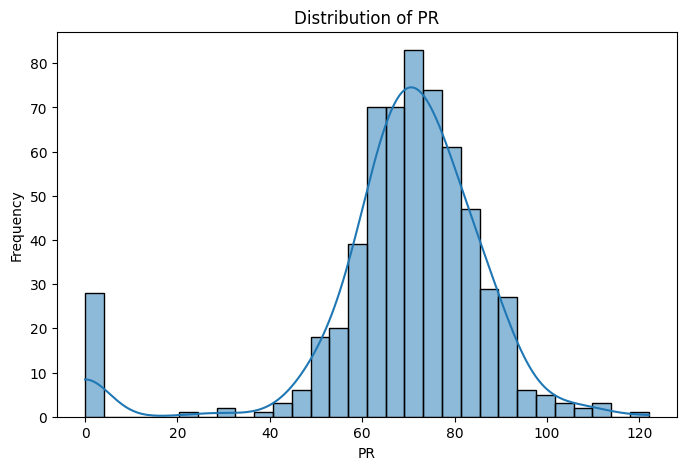

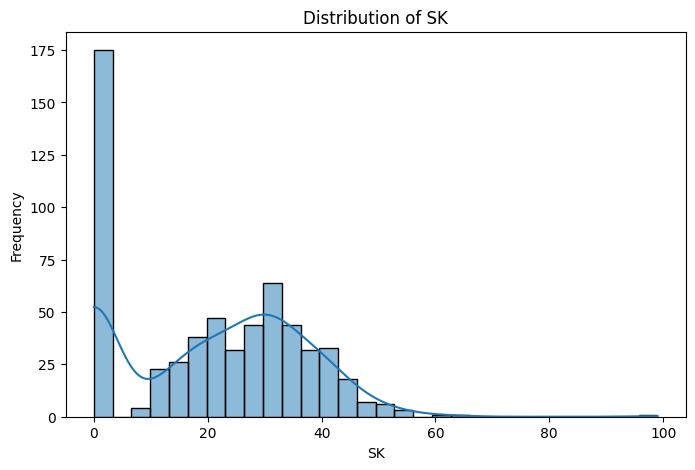

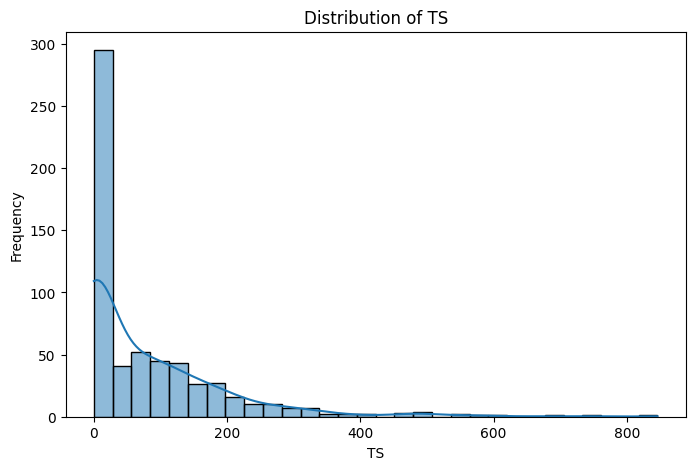

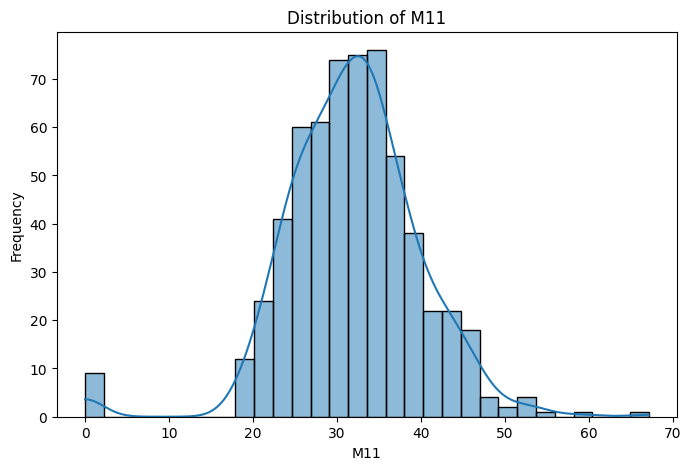

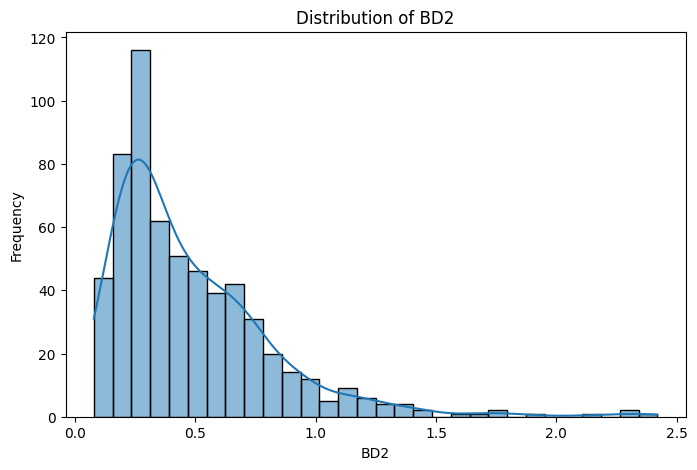

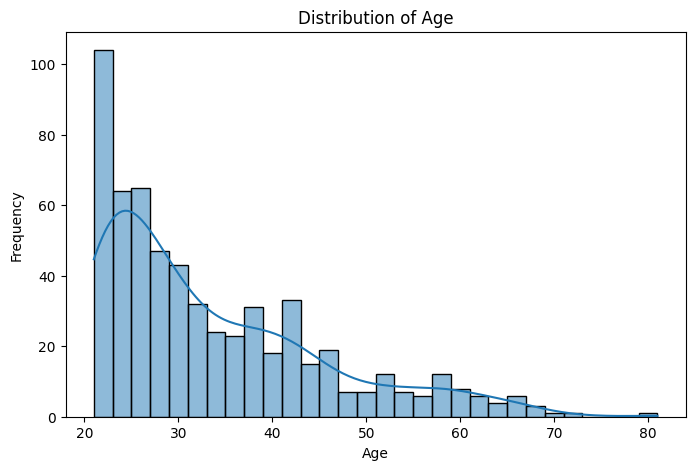

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization styling
plt.style.use('default')

# Univariate Analysis - Distribution of numerical features
numerical_features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


**EDA Summary**

The histograms above reveal the distributions of the numeric features in the training dataset. Key observations include:

* PRG (Pregnancies): Right-skewed distribution, with most values concentrated at lower counts.
* PL (Plasma glucose): Appears normally distributed, with some potential outliers on the higher end.
* PR (Blood Pressure): Normal distribution with a few outliers.
* SK (Skin Thickness): Right-skewed, with a large number of zero values.
* TS (Time Spent): Highly right-skewed with many zero values.
* M11: Normal distribution with moderate spread.
* BD2: Skewed distribution with values concentrated near the lower range.
* Age: Slightly right-skewed distribution, with most patients between 20-40 years.

**Bivariate & Multivariate Analsysis**

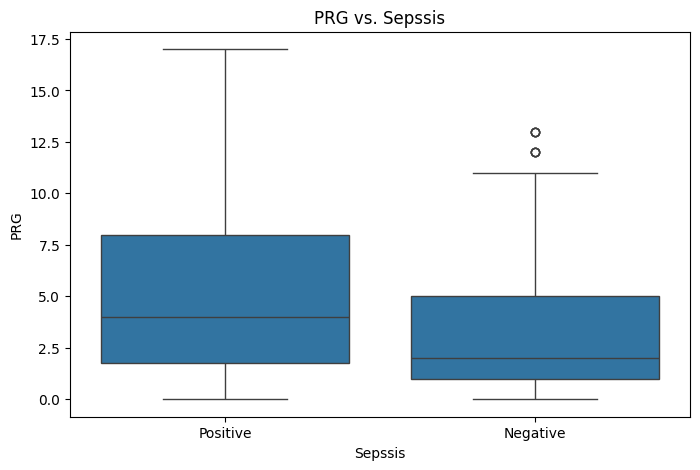

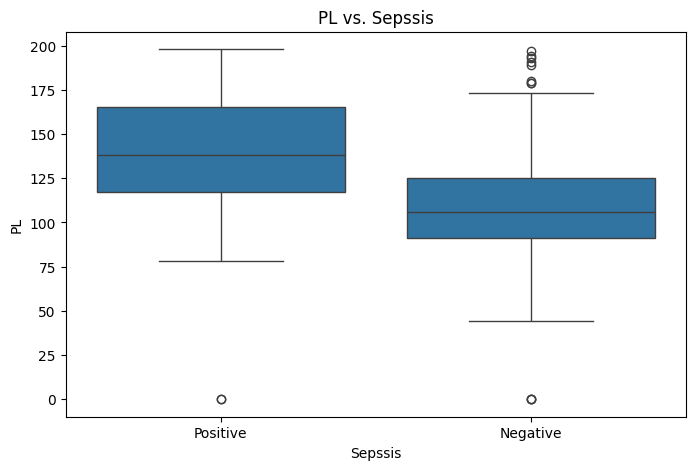

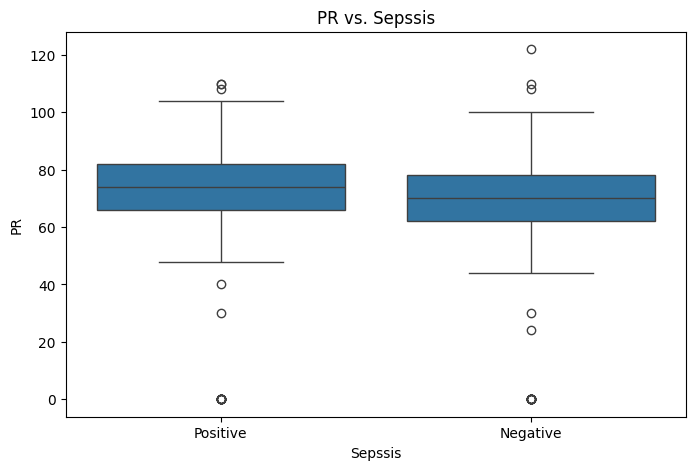

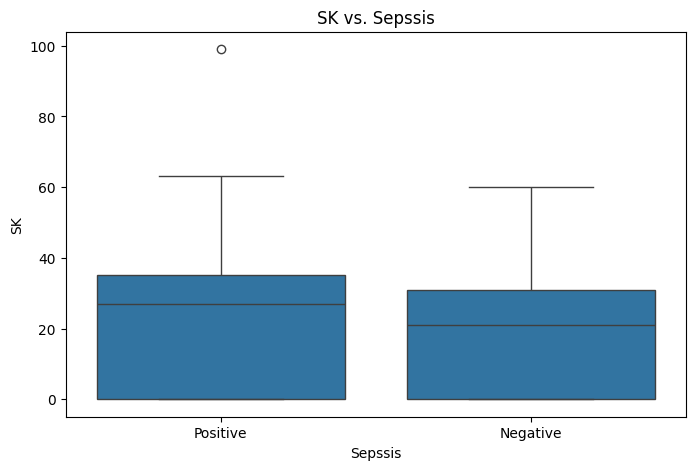

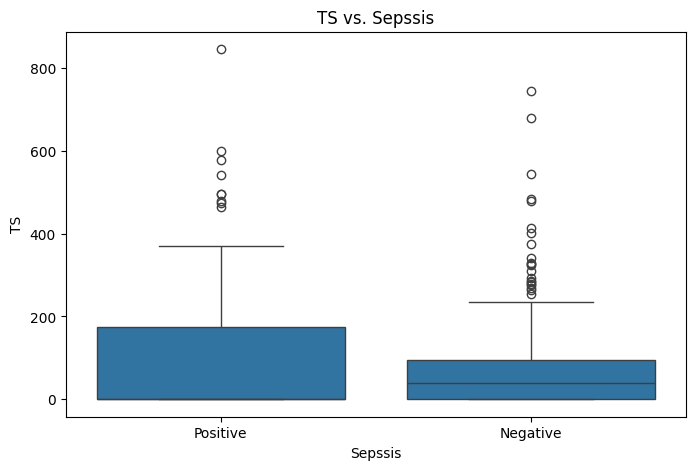

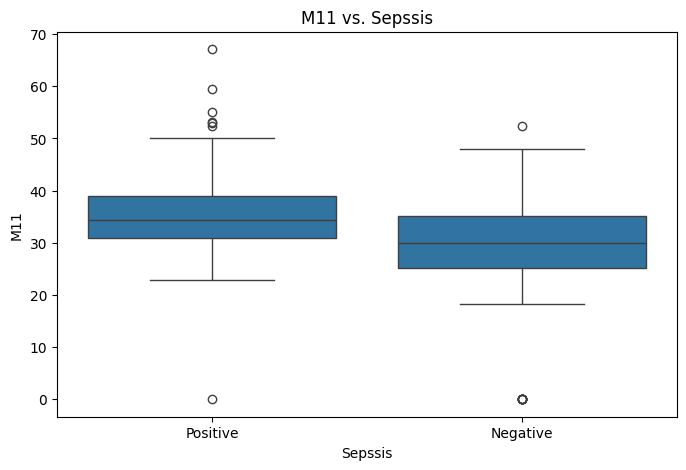

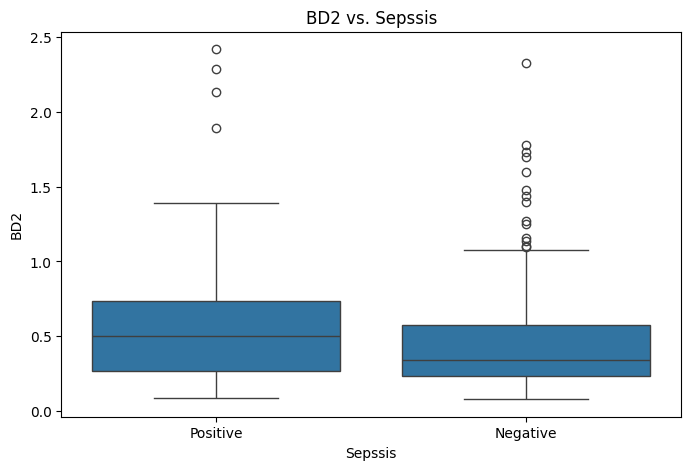

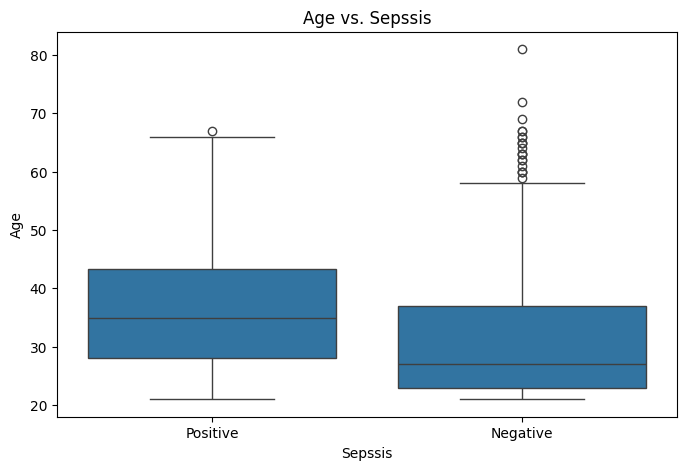

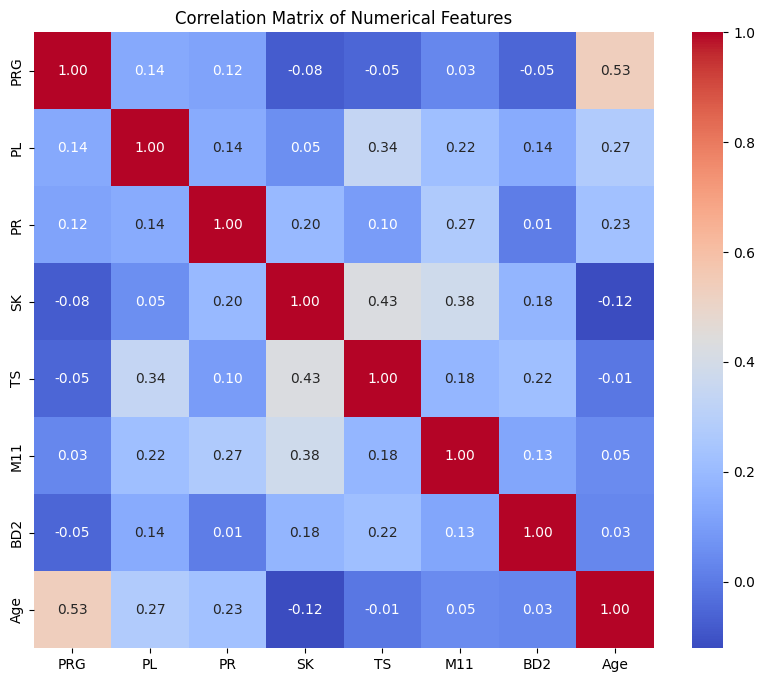

In [4]:
# Bivariate Analysis: Relationship between numerical features and the target variable (Sepssis)

# Define the numerical features and target
target_variable = 'Sepssis'

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_data, x=target_variable, y=feature)
    plt.title(f"{feature} vs. {target_variable}")
    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.show()

# Visualize correlation matrix for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


**Observation from Bivariate Analsysis**

Boxplots for Numerical Features vs. Target Variable (Sepssis):

* Features like PL (Plasma Glucose) and BD2 exhibit distinct distributions between "Positive" and "Negative" categories, indicating potential predictive power.
* Other features, such as SK (Skin Thickness) and TS (Time Spent), show overlapping distributions, suggesting limited differentiation power.
Correlation Matrix:

* Some features show moderate correlations (e.g., PL and BD2), while others (e.g., SK, TS) exhibit weak or no correlations with others.
* Correlation insights will guide feature selection and engineering in subsequent steps

**Hypothesis testing**

In [6]:
from scipy.stats import ttest_ind
import pandas as pd
from IPython.display import display

# Hypothesis Testing: Comparing distributions of features for Sepsis = Positive vs Negative
results = []

# Ensure no NaNs in the target variable or numerical features
train_data = train_data.dropna(subset=numerical_features + [target_variable])

for feature in numerical_features:
    try:
        # Split data by target variable
        positive = train_data[train_data[target_variable] == 'Positive'][feature].dropna()
        negative = train_data[train_data[target_variable] == 'Negative'][feature].dropna()
        
        # Perform independent t-test
        if len(positive) > 1 and len(negative) > 1:  # Ensure sufficient samples
            stat, p_value = ttest_ind(positive, negative, equal_var=False)  # Welch's t-test
        else:
            stat, p_value = None, None  # Insufficient data

        results.append({"Feature": feature, "t-statistic": stat, "p-value": p_value})
    except Exception as e:
        results.append({"Feature": feature, "Error": str(e)})

# Convert results to DataFrame
hypothesis_results = pd.DataFrame(results)

# Filter out features with insufficient data or errors
hypothesis_results = hypothesis_results[hypothesis_results["p-value"].notna()]

# Sort results by p-value
hypothesis_results.sort_values(by="p-value", inplace=True)

# Display the results in Jupyter Notebook
display(hypothesis_results)




,Feature,t-statistic,p-value
1,PL,11.614265,1.067691e-26
5,M11,8.341876,8.870890e-16
7,Age,5.398029,1.085959e-07
0,PRG,4.842534,1.924247e-06
6,BD2,4.200286,3.394056e-05
4,TS,3.261255,1.228042e-03
3,SK,1.751799,8.065620e-02
2,PR,1.411005,1.591086e-01


**Data preprocessing and Modelling**

In [8]:
# Reload the necessary libraries and datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Paths to datasets
train_path = 'Data/Paitients_Files_Train.csv'
test_path = 'Data/Paitients_Files_Test.csv'

# Reload training data
train_data = pd.read_csv(train_path)

# Encode the target variable
label_encoder = LabelEncoder()
train_data['Sepssis_Encoded'] = label_encoder.fit_transform(train_data['Sepssis'])

# Define features and target
X = train_data.drop(columns=['ID', 'Sepssis', 'Sepssis_Encoded'])
y = train_data['Sepssis_Encoded']

# Address zero values (e.g., replace zeros in features where appropriate)
# Assuming TS and SK have zero values indicating missing data
X['TS'] = X['TS'].replace(0, X['TS'].median())
X['SK'] = X['SK'].replace(0, X['SK'].median())

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Show a summary of the processed data
(X_train_scaled.shape, X_val_scaled.shape, y_train.shape, y_val.shape)


((479, 9), (120, 9), (479,), (120,))

**Data Preprocessing Summary**

Train-test split:
* Training data: 479 samples × 9 features.
* Validation data: 120 samples × 9 features.
* Scaling: Numerical features were standardized to ensure uniformity and better model convergence.
* Target encoding: "Sepssis" converted to numerical labels: 1 for "Positive" and 0 for "Negative".

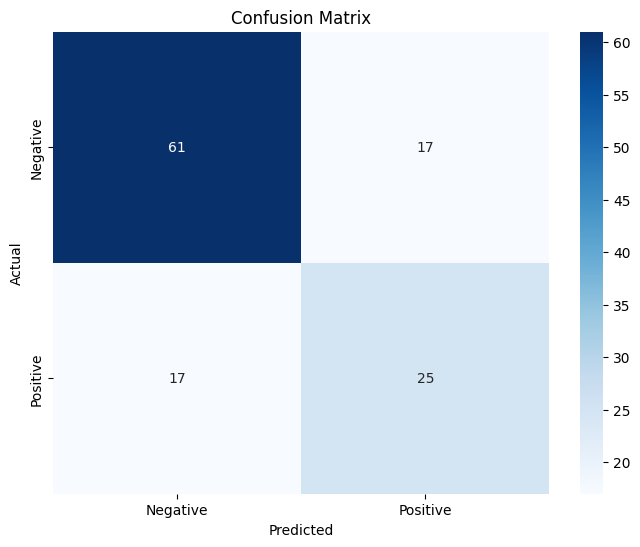

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions on validation set
y_val_pred = rf_model.predict(X_val_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Display evaluation metrics
accuracy, classification_rep

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Model Evaluation Summary**

* Accuracy: The accuracy of the Random Forest model on the validation set is displayed above.
* Classification Report: Precision, recall, F1-score, and support for each class are summarized to evaluate performance across metrics.
* Confusion Matrix: Visualizes true positive, true negative, false positive, and false negative counts.

**Implement the model on Test data**

In [10]:
# Reload the test dataset
test_data = pd.read_csv(test_path)

# Preprocess the test data: Handle zero values and scale features
X_test = test_data.drop(columns=['ID'])

# Replace zero values in critical features with the median of the training data
X_test['TS'] = X_test['TS'].replace(0, X['TS'].median())
X_test['SK'] = X_test['SK'].replace(0, X['SK'].median())

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions using the trained Random Forest model
y_test_pred = rf_model.predict(X_test_scaled)

# Decode predictions back to original labels
test_data['Sepssis_Predicted'] = label_encoder.inverse_transform(y_test_pred)

# Display a preview of predictions
test_data[['ID', 'Sepssis_Predicted']].head()


,ID,Sepssis_Predicted
0,ICU200609,Negative
1,ICU200610,Negative
2,ICU200611,Negative
3,ICU200612,Negative
4,ICU200613,Positive


**Saving Clean data,Model and preprocessor**

In [11]:
import joblib

# Save the cleaned data
cleaned_test_path = './Models/Cleaned_Test_Data.csv'
test_data.to_csv(cleaned_test_path, index=False)

# Save the trained model
model_path = './Models/RandomForest_Sepssis_Model.pkl'
joblib.dump(rf_model, model_path)

# Save the scaler (preprocessor)
scaler_path = './Models/StandardScaler.pkl'
joblib.dump(scaler, scaler_path)

{"Cleaned Test Data": cleaned_test_path, "Model Path": model_path, "Scaler Path": scaler_path}


{'Cleaned Test Data': './Models/Cleaned_Test_Data.csv',
 'Model Path': './Models/RandomForest_Sepssis_Model.pkl',
 'Scaler Path': './Models/StandardScaler.pkl'}

**Load the Model for Prediction**

In [12]:
# Load the saved model and scaler
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Verify loading by making a prediction on a small sample from the test data
sample_data = X_test.iloc[:5]
sample_scaled = loaded_scaler.transform(sample_data)
sample_predictions = loaded_model.predict(sample_scaled)

# Decode predictions
decoded_predictions = label_encoder.inverse_transform(sample_predictions)
sample_data_results = sample_data.copy()
sample_data_results['Sepssis_Predicted'] = decoded_predictions

sample_data_results


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis_Predicted
0,1,109,38,18,120,23.1,0.407,26,1,Negative
1,1,108,88,19,36,27.1,0.400,24,1,Negative
2,6,96,0,23,36,23.7,0.190,28,1,Negative
3,1,124,74,36,36,27.8,0.100,30,1,Negative
4,7,150,78,29,126,35.2,0.692,54,0,Positive
